In [2]:
!pip install embedding-as-service

     |████████████████████████████████| 140 kB 29.2 MB/s 
     |████████████████████████████████| 57 kB 4.4 MB/s 
     |████████████████████████████████| 17.3 MB 109 kB/s 
     |████████████████████████████████| 110.5 MB 18 kB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 1.0 MB 55.2 MB/s 
     |████████████████████████████████| 75 kB 3.7 MB/s 
     |████████████████████████████████| 312 kB 60.9 MB/s 
     |████████████████████████████████| 50 kB 4.7 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
     |████████████████████████████████| 1.4 MB 43.9 MB/s 
     |████████████████████████████████| 131 kB 73.3 MB/s 
     |████████████████████████████████| 3.8 MB 75.4 MB/s 
     |████████████████████████████████| 503 kB 49.1 MB/s 
     |████████████████████████████████| 7.8 MB 57.6 MB/s 
     |██████████████████████

In [1]:
import pandas as pd
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# sentence feature extracter
from embedding_as_service.text.encode import Encoder
# scikit model used
from sklearn import linear_model
# metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
url_1 = 'https://raw.githubusercontent.com/TeamEpicProjects/Customer_Support_Ticket_Classification/Day_04/ticket_train.csv'
train = pd.read_csv(url_1)
url_2 = 'https://raw.githubusercontent.com/TeamEpicProjects/Customer_Support_Ticket_Classification/Day_04/ticket_valid.csv'
valid = pd.read_csv(url_2)

In [5]:
model_encode = Encoder(embedding='word2vec', model='google_news_300')

Model does not exists, Downloading model: google_news_300
[||||||||||||||||||||||||||||||||||||||||||||||||||] 100 % [1608443/1608443 kb]
Model downloaded successfully!
Loading Model (this might take few minutes).....

  0%|          | 0/3000000 [00:00<?, ?it/s]

100%|██████████| 3000000/3000000 [02:14<00:00, 22238.31it/s]

Model loaded Successfully !


In [6]:
# encoding training dataset
train_encode = model_encode.encode(texts = list(train['info'].values), pooling='reduce_mean')
train_encode.shape

(38839, 300)

In [7]:
# encoding validation dataset
valid_encode = model_encode.encode(texts = list(valid['info'].values), pooling='reduce_mean')
valid_encode.shape

(4855, 300)

In [8]:
# creating Logistic Regression instance and fitting the model with training word2vec encoded vector and target ticket_type column
LRG = linear_model.LogisticRegression(random_state = 35,solver = 'liblinear',multi_class = 'auto').fit(train_encode, train['ticket_type'])
# 

In [9]:
y_valid_preds = LRG.predict(valid_encode)

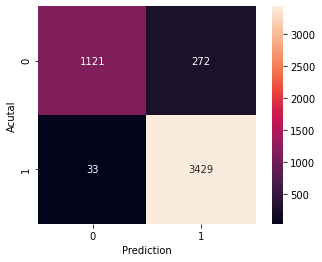

In [10]:
con_mat = confusion_matrix(valid['ticket_type'], y_valid_preds)
sns.heatmap(con_mat, annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [11]:
acc = accuracy_score(valid['ticket_type'], y_valid_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 93.72%.


In [12]:
print(classification_report(valid['ticket_type'], y_valid_preds))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1393
           1       0.93      0.99      0.96      3462

    accuracy                           0.94      4855
   macro avg       0.95      0.90      0.92      4855
weighted avg       0.94      0.94      0.94      4855

